# UnitedStates_COVID_19_dataset(Projects Dynamics Number 9)

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [36]:
data=pd.read_csv('covidusa.csv')
data
# This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).
# Field description
#Province_State - The name of the State within the USA.
#Country_Region - The name of the Country (US).
#Last_Update - The most recent date the file was pushed.
#Lat - Latitude.
#Long_ - Longitude.
#Confirmed - Aggregated confirmed case count for the state.
#Deaths - Aggregated Death case count for the state.
#Recovered - Aggregated Recovered case count for the state.
#Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
#FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
#Incident_Rate - confirmed cases per 100,000 persons.
#People_Tested - Total number of people who have been tested.
#People_Hospitalized - Total number of people hospitalized.
#Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
#UID - Unique Identifier for each row entry.
#ISO3 - Officialy assigned country code identifiers.
#Testing_Rate - Total number of people tested per 100,000 persons.
#Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.



,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [37]:
df=pd.DataFrame(data=data)
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# EDA

In [38]:
df.shape

(58, 18)

In [39]:
df1=df.copy()
df1.info()
# Null values present in various dataset
# datatypes -> 4 object columns, 4 integer column &  10 float column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [40]:
df1['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [41]:
le=LabelEncoder()

In [42]:
df1['Province_State']=le.fit_transform(df1['Province_State'])
# Converting object column into a numerical one

In [43]:
df1['Country_Region'].unique()
# we can drop this column

array(['US'], dtype=object)

In [44]:
df1['Last_Update'].unique()
# we can drop this column

array(['2020-05-21 02:32:54'], dtype=object)

In [45]:
df1['FIPS'].unique()
# we can drop this column 

array([    1,     2,    60,     4,     5,     6,     8,     9,    10,
       88888,    11,    12,    13, 99999,    66,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    69,    39,    40,    41,    42,    72,
          44,    45,    46,    47,    48,    49,    50,    78,    51,
          53,    54,    55,    56], dtype=int64)

In [46]:
df1['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [47]:
df1['ISO3']=le.fit_transform(df1['ISO3'])
# Converting object column into a numerical one

In [48]:
df1['Recovered']=df1['Recovered'].replace(np.NaN,df1['Recovered'].mean())

In [49]:
df1['Incident_Rate']=df1['Incident_Rate'].replace(np.NaN,df1['Incident_Rate'].mean())

In [50]:
df1['People_Tested']=df1['People_Tested'].replace(np.NaN,df1['People_Tested'].mean())

In [51]:
# People Hospitalized -> in this column 25 out 58 row are missing values. 
# we can't take mean value to fill the values since every province has got different number of people tested.
# so in order analyse & train the model to predict the best possible target, we might have to drop this column

In [53]:
df1['Mortality_Rate']=df1['Mortality_Rate'].replace(np.NaN,df1['Mortality_Rate'].mean())

In [54]:
# UID -> this column provides Unique Identifier for each row entry. we can drop this for analyzation purpose.

In [55]:
df1['Testing_Rate']=df1['Testing_Rate'].replace(np.NaN,df1['Testing_Rate'].mean())

In [56]:
df1['Hospitalization_Rate']=df1['Hospitalization_Rate'].replace(np.NaN,df1['Hospitalization_Rate'].mean())

In [57]:
df2=df1.drop(['Country_Region','Last_Update','People_Hospitalized','UID'],axis=1)
df2.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,3.999387,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,2.493766,4,5063.940017,14.342541
2,2,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4.458248,0,222.857246,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,5.011405,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,2.138717,4,3189.670370,10.693584


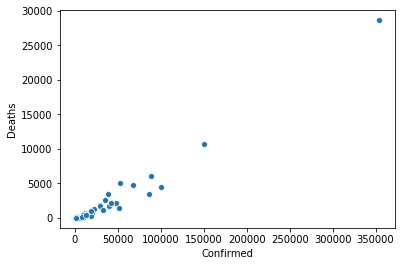

In [58]:
sns.scatterplot(data=df2,x='Confirmed',y='Deaths')
# confirmed cases have direct relation with number of fatalities 

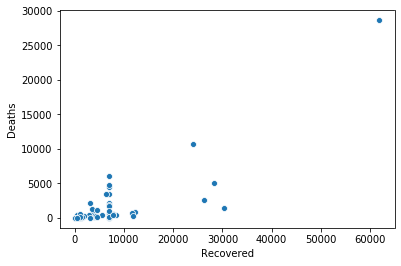

In [59]:
sns.scatterplot(data=df2,x='Recovered',y='Deaths')

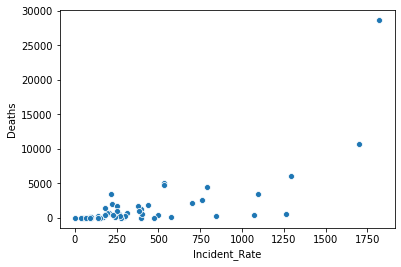

In [60]:
sns.scatterplot(data=df2,x='Incident_Rate',y='Deaths')
# incident rate has  direct relation with number of fatalities 

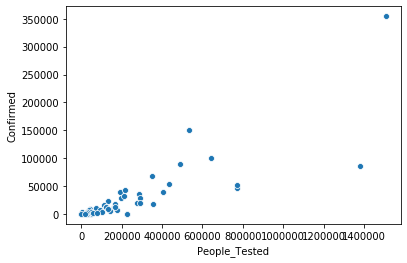

In [61]:
sns.scatterplot(data=df2,x='People_Tested',y='Confirmed')
# more the people are being tested, the confirmed cases are getting higher

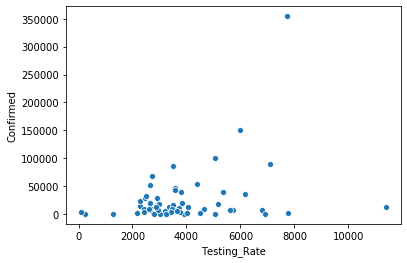

In [62]:
sns.scatterplot(data=df2,x='Testing_Rate',y='Confirmed')

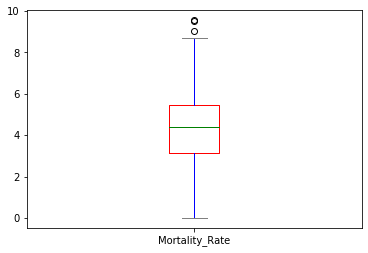

In [63]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot
df2['Mortality_Rate'].plot.box(color=c)

# Mortality rate falls between 3-5%

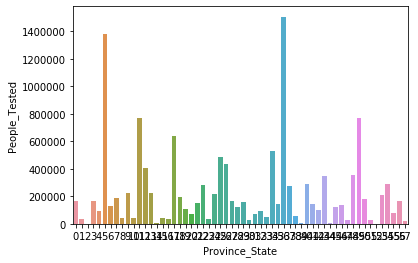

In [64]:
sns.barplot(x='Province_State',y='People_Tested',data=df2)
plt.show()
# we can see Mass testimg is not occuring uniformly among all provinces. 

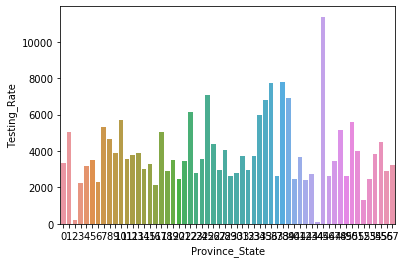

In [65]:
sns.barplot(x='Province_State',y='Testing_Rate',data=df2)
plt.show()
# we can observe, testing rate is also not uniform to all provinces

In [66]:
df3=df2.drop('FIPS',axis=1)
df3.shape
# lets drop this column too since it has no impact to predict the fatality

(58, 13)

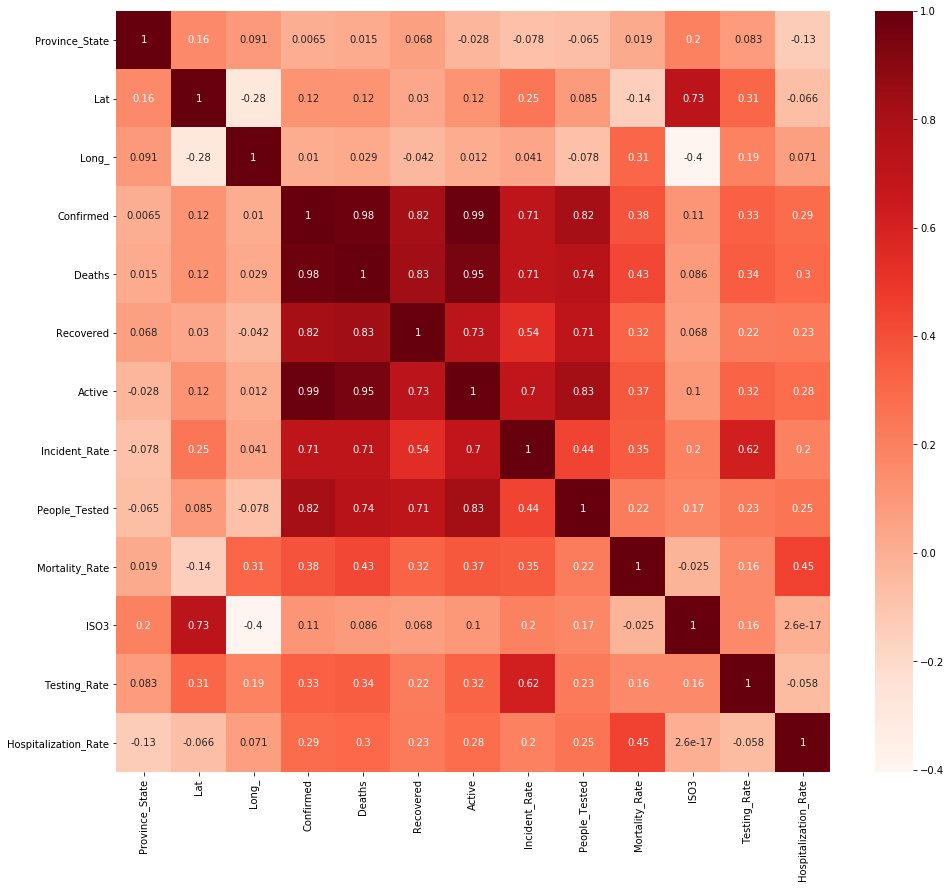

In [67]:
plt.figure(figsize=(16,14))
sns.heatmap(df3.corr(),cmap='Reds',annot=True)

In [68]:
df4=df3.dropna(axis=0)
df4.info()
# after filling the null values, lets drop the row which still carries some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        56 non-null     int32  
 1   Lat                   56 non-null     float64
 2   Long_                 56 non-null     float64
 3   Confirmed             56 non-null     int64  
 4   Deaths                56 non-null     int64  
 5   Recovered             56 non-null     float64
 6   Active                56 non-null     float64
 7   Incident_Rate         56 non-null     float64
 8   People_Tested         56 non-null     float64
 9   Mortality_Rate        56 non-null     float64
 10  ISO3                  56 non-null     int32  
 11  Testing_Rate          56 non-null     float64
 12  Hospitalization_Rate  56 non-null     float64
dtypes: float64(9), int32(2), int64(2)
memory usage: 5.7 KB


# Cleaning the Dataset

In [69]:
z=np.abs(zscore(df4))
z

array([[1.74433115e+00, 4.19105112e-01, 3.43895195e-02, 2.77696704e-01,
        2.78993282e-01, 0.00000000e+00, 1.98989889e-01, 3.25848024e-01,
        2.07371343e-01, 2.77902712e-01, 2.21229741e-01, 2.81989619e-01,
        7.61026862e-01],
       [1.68443996e+00, 2.27358604e+00, 1.36281125e+00, 5.17387899e-01,
        4.03585136e-01, 6.66254559e-01, 5.00094715e-01, 8.55525316e-01,
        6.37642979e-01, 1.01705882e+00, 2.21229741e-01, 6.10572166e-01,
        0.00000000e+00],
       [1.62454876e+00, 4.73716127e+00, 1.72233757e+00, 5.24985415e-01,
        4.06018571e-01, 0.00000000e+00, 5.01034839e-01, 9.92883075e-01,
        7.62332426e-01, 5.26337067e-02, 5.28493270e+00, 1.91631173e+00,
        0.00000000e+00],
       [1.56465756e+00, 2.88272900e-01, 5.31850269e-01, 2.42570036e-01,
        2.24241003e-01, 3.23788732e-01, 2.50672600e-01, 4.79719109e-01,
        2.04044805e-01, 2.18928066e-01, 2.21229741e-01, 8.46278941e-01,
        6.08190292e-01],
       [1.50476636e+00, 1.73354468e-

In [70]:
print(np.where(z>3))

(array([ 2,  2,  5,  7, 12, 12, 32, 34, 34, 34, 34, 34, 34, 37, 43],
      dtype=int64), array([ 1, 10,  8, 12,  2, 10,  7,  3,  4,  5,  6,  7,  8,  2, 11],
      dtype=int64))


In [71]:
df4n=df4[(z<3).all(axis=1)]
df4n.shape

(48, 13)

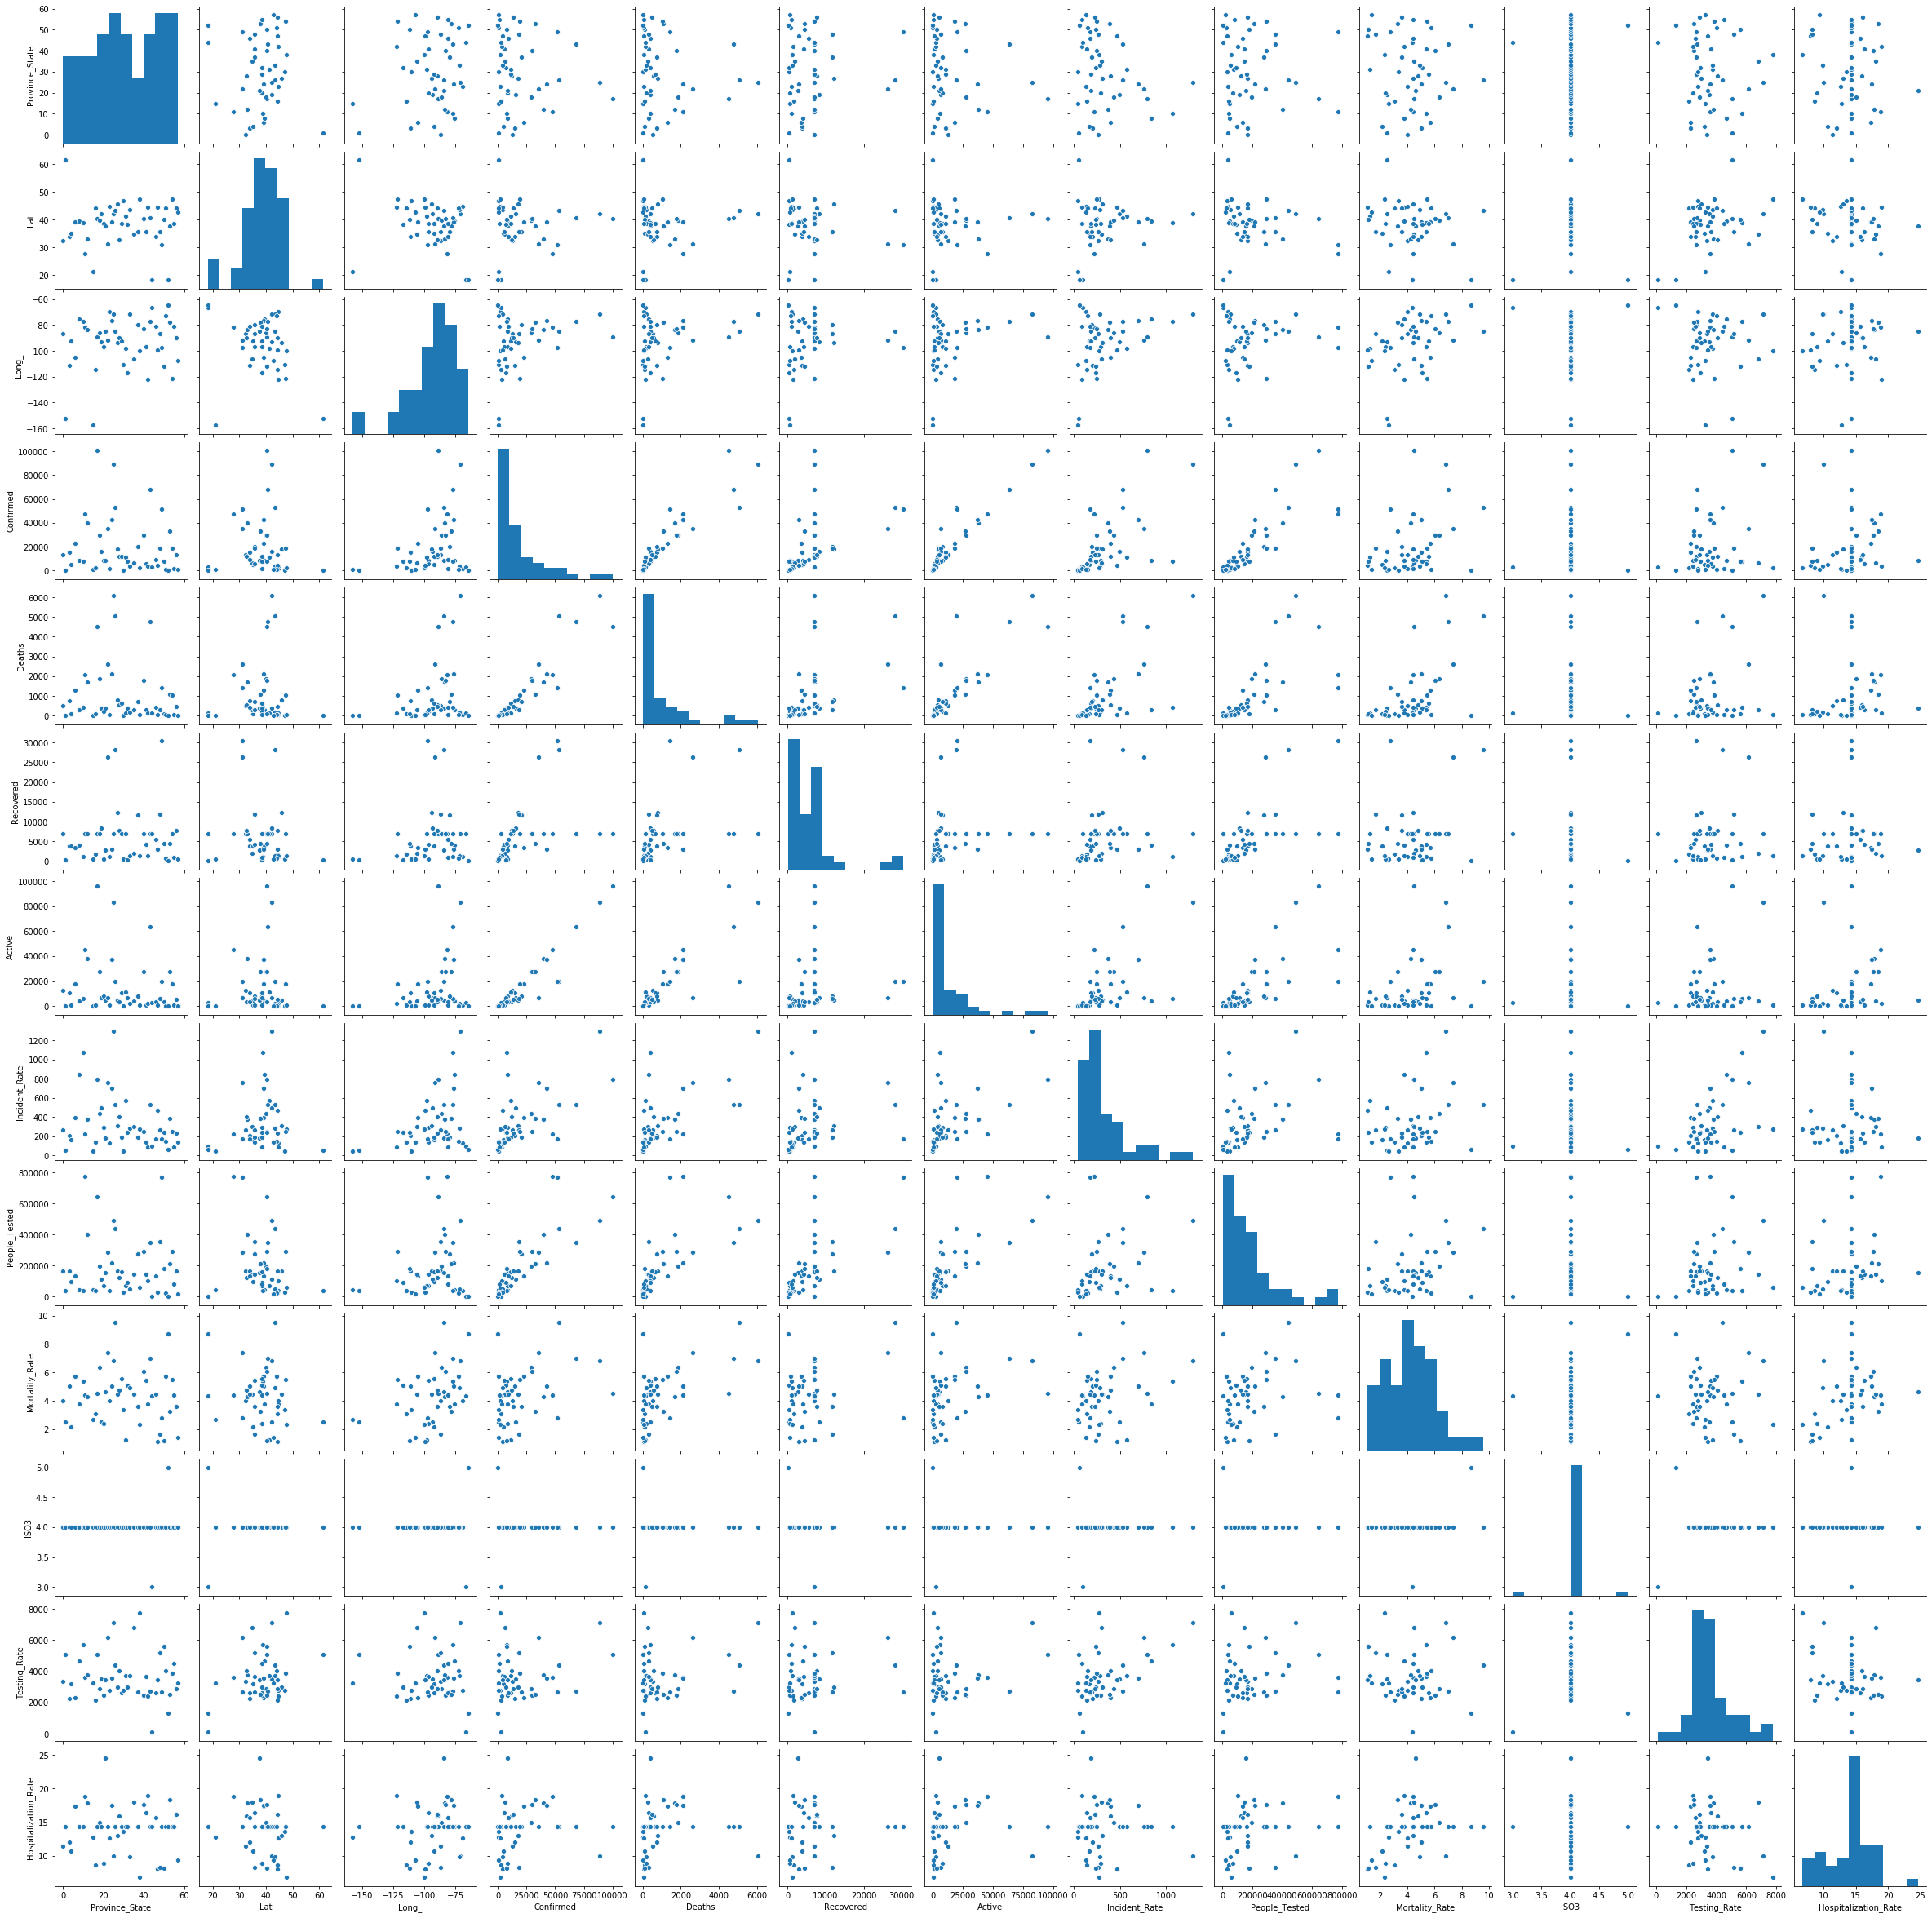

In [72]:
sns.pairplot(df4n)

# Model Training 

In [73]:
# Separating Feature variables and Target variable
x=df4n.drop('Deaths',axis=1) # Feathure columns
y=df4n['Deaths'] # Target

In [74]:
x.shape,y.shape

((48, 12), (48,))

In [75]:
m=MinMaxScaler()
# lest scale the feature columns to train the model better

In [76]:
x=m.fit_transform(x)

In [77]:
# Optimising the seed value(random state)
# the output values are continous. so we have to comsider the regression algorithms here
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

score correspondng to random state 41 is: 0.9729836435906238
score correspondng to random state 42 is: 0.9655024456147788
score correspondng to random state 43 is: 0.9698195766955063
score correspondng to random state 44 is: 0.9827313343463281
score correspondng to random state 45 is: 0.9889019390159064
score correspondng to random state 46 is: 0.9770998930036128
score correspondng to random state 47 is: 0.9541914664941205
score correspondng to random state 48 is: 0.9704326113189875
score correspondng to random state 49 is: 0.9702231445238323
score correspondng to random state 50 is: 0.9439726868315759
score correspondng to random state 51 is: 0.9556634116435155
score correspondng to random state 52 is: 0.970345146715162
score correspondng to random state 53 is: 0.9722011734241942
score correspondng to random state 54 is: 0.9676725639181816
score correspondng to random state 55 is: 0.9721921608065149
score correspondng to random state 56 is: 0.9742222290485425
score correspondng to ran

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.3)

In [79]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
print('Model_score:',lm.score(x_train,y_train))
# we achieve the score of 0.99 which implies model has learnt almost closed to 99% perfection.

Model_score: 0.9889019390159064


In [81]:
print('error:')   ## calculating the error
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 2159.9912088281408
mean squared error: 8269712.750732867
root mean squared error: 2875.710825297437


In [82]:
lm.coef_

array([-3.13065069e+01, -1.15991758e+02, -2.24150091e+02,  9.26900151e+02,
        1.62400312e+03,  4.41315964e+03, -1.77466038e+02, -1.54168264e+03,
        7.03261703e+02,  9.10807742e+02,  1.49608545e+02,  1.00785077e+00])

In [83]:
# trying to check overfitting/underfitting of the model and chosing the hyperparameter
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.6641644869102794
{'alpha': 1.0}


In [84]:
ls=Lasso(alpha=1.0)
ls.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
ls.score(x_train,y_train)

0.9837214264059485

In [86]:
# Linear Regression gives us the score of 0.9889
# Lasso Regression gives us the score of 0.9837
# As we know Lasso alpha parameter settles all the bias and variance. 
# Hence its better to save Lasso to train the model and predict the fatality(Deaths)

In [87]:
joblib.dump(ls,'lscovidusa.obj')
## We settle this dataset with Linear Regression model since the score is higher. we saved the model as well. 

['lscovidusa.obj']